# Optimization results for the Power series, Fourier series and Gaussian superposition pulses

In [14]:
# !pip install uncertainties
# !pip install quantum_gates

In [15]:
# !pip install pandas>= 1.4.0

## Imports

In [29]:
import numpy as np
import pandas as pd
import json 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import ast

import sys
sys.path.append('../..')
from pulse_opt.pulses.power_factory import PowerFactory
from pulse_opt.pulses.fourier_factory import FourierFactory
from pulse_opt.pulses.gaussian_factory import GaussianFactory

In [30]:
def set_matplotlib_style(overwrite: dict={}):
    """Sets the rc parameters to pre-defined values.

    Use the overwrite lookup to overwrite the default behaviour.

    Args:
        overwrite (dict): Lookup table which can be used to overwrite the default values.
    """
    plt.rcParams.update({
        "axes.titlesize": 16,
        "axes.labelsize": 12,
        "lines.linewidth": 1.5,
        "lines.markersize": 5,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": "medium",
        "figure.figsize": (8, 6),
    })

    # Plot background -> white inside, transparent outside
    plt.rcParams.update({
        "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # white with alpha = 0%
        "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),  # white with alpha = 100%
        "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # white with alpha = 0%
    })

    # Plot error bars
    plt.rcParams.update({
        "errorbar.capsize":  8,  # Length of the error bar caps
    })

    # Overwrite default behaviour
    if isinstance(overwrite, dict) and len(overwrite) > 0:
        plt.rcParams.update(overwrite)
    return


def activate_latex(preamble_list: list[str]=[]):
    """Activates LaTeX for use in Matplotlib and import some packages.

    Imported packages include amsmath, amssymb, and braket.

    Examples:
        preamble_list = ['\\usepackage{myfancypackage}'] where the string has an r as prefix.

    Args:
        preample_list (list[str]): List of raw str that represent the lines of the LaTeX preample used for imports.
    """

    pgf_with_latex = {
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif": ["Helvetica"],
        "text.latex.preamble": "\n".join([
            r"\usepackage[utf8]{inputenc}",
            r"\usepackage[T1]{fontenc}",
            r"\usepackage{amsmath}",
            r"\usepackage{amssymb}",
            r"\usepackage{braket}",
        ] + preamble_list)
    }
    mpl.rcParams.update(pgf_with_latex)
    return

In [31]:
set_matplotlib_style()

## Paths

In [32]:
rel_folder = "../../results/integrals"

## Settings

In [33]:
theta = "1.570796"
theta_str = "pi half"

## Data loading 

In [34]:
runs = [
        'power_test',
        'fourier_test',
        'gaussian_test',
        'power_small',
        'fourier_small',
        'gaussian_small',
        'power',
        'fourier',
        'gaussian'
]
pd_lookup = {
    run: pd.read_csv(f"{rel_folder}/{run}/results.csv") for run in runs
}

In [35]:
# Query dfs to only contain rows for certain theta value
pd_lookup = {
    run: df.loc[abs(df['theta'] - 1.570796) <= 1e-3] for run, df in pd_lookup.items()
}

In [36]:
factory_lookup = {
    'power_test': PowerFactory,
    'fourier_test': FourierFactory,
    'gaussian_test': GaussianFactory,
    'power_small': PowerFactory, 
    'fourier_small': FourierFactory,
    'gaussian_small': GaussianFactory,
    'power': PowerFactory,
    'fourier': FourierFactory,
    'gaussian': GaussianFactory
}

In [37]:
pd_lookup["power_test"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
0,0,power_test,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.5,1,1.570796,...,0.0,2.565531,5.000000e-09,1.0,2.048000e-09,2.048000e-09,2,478,True,`xtol` termination condition is satisfied.


In [38]:
pd_lookup["power_small"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
1,1,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,1,1.570796,...,0.000000e+00,0.316203,7.648186e+03,1.0,3.200000e-05,3.200000e-05,1,37,True,`gtol` termination condition is satisfied.
5,5,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,2,1.570796,...,1.776357e-15,1.109372,9.735924e+05,1.0,1.280000e-06,1.280000e-06,1,180,True,`gtol` termination condition is satisfied.
9,9,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,3,1.570796,...,9.636736e-14,1.370414,4.996432e+07,1.0,1.024000e-08,1.024000e-08,1,109,True,`gtol` termination condition is satisfied.
13,13,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,4,1.570796,...,6.764367e-12,2.285565,5.052077e+07,1.0,1.024000e-08,1.024000e-08,1,94,True,`gtol` termination condition is satisfied.
17,17,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,5,1.570796,...,1.072920e-12,4.102201,5.091559e+07,1.0,1.024000e-08,1.024000e-08,1,101,True,`gtol` termination condition is satisfied.


In [39]:
pd_lookup["power"]

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
1,1,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,1,1.570796,...,0.000000e+00,0.618325,7.648186e+03,1.0,3.200000e-05,3.200000e-05,1,37,True,`gtol` termination condition is satisfied.
5,5,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,2,1.570796,...,1.776357e-15,2.756660,9.735924e+05,1.0,1.280000e-06,1.280000e-06,1,180,True,`gtol` termination condition is satisfied.
9,9,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,3,1.570796,...,9.636736e-14,2.995572,4.996432e+07,1.0,1.024000e-08,1.024000e-08,1,109,True,`gtol` termination condition is satisfied.
13,13,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,4,1.570796,...,6.764367e-12,4.467706,5.052077e+07,1.0,1.024000e-08,1.024000e-08,1,94,True,`gtol` termination condition is satisfied.
17,17,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,5,1.570796,...,1.072920e-12,8.008783,5.091559e+07,1.0,1.024000e-08,1.024000e-08,1,101,True,`gtol` termination condition is satisfied.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,421,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.0,6,1.570796,...,0.000000e+00,41.212731,6.635470e-09,1.0,2.048000e-09,2.048000e-09,2,171,True,`xtol` termination condition is satisfied.
425,425,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.0,7,1.570796,...,2.842171e-14,177.954740,4.125380e-05,1.0,1.280000e-06,1.280000e-06,0,1000,False,The maximum number of function evaluations is ...
429,429,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.0,8,1.570796,...,1.421085e-14,143.799893,3.021648e-09,1.0,2.048000e-09,2.048000e-09,2,443,True,`xtol` termination condition is satisfied.
433,433,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.0,9,1.570796,...,1.065814e-14,223.014971,9.814571e-09,1.0,2.048000e-09,2.048000e-09,2,720,True,`xtol` termination condition is satisfied.


In [40]:
pd_lookup["fourier_test"]

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
0,0,fourier_test,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,1,1.570796,...,0.0,1.917876,1.000000e-09,1.0,2.048000e-09,2.048000e-09,2,78,True,`xtol` termination condition is satisfied.


In [41]:
pd_lookup["fourier_small"]

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
1,1,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,1,1.570796,...,0.000000e+00,3.234724,1.000000e-09,1.0,2.048000e-09,2.048000e-09,2,78,True,`xtol` termination condition is satisfied.
5,5,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,2,1.570796,...,1.776357e-15,19.562126,9.742237e-09,1.0,2.048000e-09,2.048000e-09,2,105,True,`xtol` termination condition is satisfied.
9,9,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,3,1.570796,...,7.571721e-14,338.046555,3.305431e-07,1.0,1.024000e-08,1.024000e-08,0,1000,False,The maximum number of function evaluations is ...
13,13,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,4,1.570796,...,1.421085e-14,557.023370,7.863449e-09,1.0,2.048000e-09,2.048000e-09,2,872,True,`xtol` termination condition is satisfied.
17,17,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,5,1.570796,...,0.000000e+00,490.441899,2.091390e-09,1.0,2.048000e-09,2.048000e-09,2,525,True,`xtol` termination condition is satisfied.
21,21,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,1,1.570796,...,4.756640e-12,1.551483,1.187905e+05,1.0,6.400000e-06,6.400000e-06,1,33,True,`gtol` termination condition is satisfied.
25,25,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,2,1.570796,...,0.000000e+00,24.467348,8.145069e-09,1.0,2.048000e-09,2.048000e-09,2,136,True,`xtol` termination condition is satisfied.
29,29,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,3,1.570796,...,1.909584e-14,187.763459,5.328765e-09,1.0,2.048000e-09,2.048000e-09,2,472,True,`xtol` termination condition is satisfied.
33,33,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,4,1.570796,...,2.131628e-14,419.883456,9.660783e-09,1.0,2.048000e-09,2.048000e-09,2,614,True,`xtol` termination condition is satisfied.
37,37,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,5,1.570796,...,7.105427e-15,264.321523,9.261322e-09,1.0,2.048000e-09,2.048000e-09,2,246,True,`xtol` termination condition is satisfied.


In [42]:
pd_lookup["fourier"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
1,1,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,1,1.570796,...,0.000000e+00,3.705490,1.000000e-09,1.0,2.048000e-09,2.048000e-09,2,78,True,`xtol` termination condition is satisfied.
5,5,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,2,1.570796,...,1.776357e-15,24.868957,9.742237e-09,1.0,2.048000e-09,2.048000e-09,2,105,True,`xtol` termination condition is satisfied.
9,9,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,3,1.570796,...,7.571721e-14,411.515192,3.305431e-07,1.0,1.024000e-08,1.024000e-08,0,1000,False,The maximum number of function evaluations is ...
13,13,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,4,1.570796,...,1.421085e-14,643.229526,7.863449e-09,1.0,2.048000e-09,2.048000e-09,2,872,True,`xtol` termination condition is satisfied.
17,17,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,5,1.570796,...,0.000000e+00,554.603533,2.091390e-09,1.0,2.048000e-09,2.048000e-09,2,525,True,`xtol` termination condition is satisfied.


In [43]:
pd_lookup["gaussian_test"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,scale,n,theta,...,x,optimality,constr_violation,execution_time,tr_radius,constr_penalty,status,niter,success,message
0,0,gaussian_test,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.3,1,1.570796,...,[1.10568185],0.000000e+00,0.000000e+00,0.002113,1.000000,1.0,1,1,True,`gtol` termination condition is satisfied.
1,1,gaussian_test,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.3,2,1.570796,...,[-2.69444748 4.69616519],1.771096e-09,4.307665e-14,10.921773,4.528484,1.0,1,16,True,`gtol` termination condition is satisfied.


In [ ]:
pd_lookup["gaussian_small"].head()

In [46]:
pd_lookup["gaussian"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,scale,n,theta,...,x,optimality,constr_violation,execution_time,tr_radius,constr_penalty,status,niter,success,message
1,1,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,1,1.570796,...,[1.],0.000000e+00,0.000000e+00,0.005360,1.000000e+00,1.0,1,1,True,`gtol` termination condition is satisfied.
5,5,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,2,1.570796,...,[-1.53805991 3.53805991],1.103229e-08,1.110223e-16,82.967904,3.200616e-09,1.0,2,29,True,`xtol` termination condition is satisfied.
9,9,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,3,1.570796,...,[-1.51775267 -0.02059655 3.55894577],4.548326e-09,3.330669e-16,153.933340,4.549399e+00,1.0,1,23,True,`gtol` termination condition is satisfied.
13,13,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,4,1.570796,...,[-1.56429397 0.06082851 -0.09477986 3.63219668],2.323824e-08,1.110223e-16,684.727539,1.856758e-09,1.0,2,43,True,`xtol` termination condition is satisfied.
17,17,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,5,1.570796,...,[-1.61129085 0.07901464 0.00929943 -0.144171...,3.023608e-08,0.000000e+00,646.302021,5.761159e-09,1.0,2,36,True,`xtol` termination condition is satisfied.


## Prepare pulse and fun lookups

In [47]:
import re

def replace_whitespace_with_comma(string):
    return re.sub(r'(?<=\d|\.)\s+', ',', string.strip())

In [48]:
pulse_lookup = {}
key_lookup = {
    run: (
        ["n", "scale"] if "gaussian" in run else ["n", "shift"]
) for run in runs}

for run, df in pd_lookup.items(): 
    pulses = []
    for index, row in df.iterrows(): 
        args = {key: row[key] for key in key_lookup[run]}
        factory = factory_lookup[run]
        # Workaround to deal with json encoding -> Todo: Make cleaner.
        coeff_str = replace_whitespace_with_comma(row["x"])
        coeff = eval(coeff_str)
        coefficients = np.array(coeff)
        pulse_factory = factory(**args, perform_checks=False)
        pulse = pulse_factory.sample(coefficients)
        pulses.append(pulse)
    pulse_lookup[run] = pulses

In [49]:
fun_lookup = {}

for run, df in pd_lookup.items(): 
    funs = [row['fun'] for index, row in df.iterrows()]
    fun_lookup[run] = funs

In [50]:
fun_lookup

{'power_test': [1.208092898351048],
 'fourier_test': [1.1691552012250592],
 'gaussian_test': [3.116435073636284, 1.2253051397404024],
 'power_small': [2.81584398001608,
  1.1885596290755325,
  1.185134872903212,
  0.8357138559997194,
  0.8355671967573256,
  2.3745875658572206,
  1.883872380447952,
  1.744164501016216,
  1.6286265245056026,
  1.4946632616674431,
  1.208092898351048,
  1.1359722404717043,
  0.8202771988525979,
  0.7800919670225122,
  0.6735645140181878,
  1.208092898351084,
  1.1311599794943232,
  0.7987828459095095,
  0.794799004308561,
  0.7073889375679563,
  1.2080928983530683,
  1.131159979507243,
  0.7982705562287218,
  0.780111593109523,
  0.6987285058259467],
 'fourier_small': [1.1691552012250592,
  0.7989328386263561,
  0.6780471089050139,
  0.6429579977000188,
  0.6280104606639532,
  1.116263619143242,
  0.7883268553358486,
  0.6739317987802316,
  0.6449124426481202,
  0.6277036654021312,
  0.8096751569193757,
  0.6800683288785716,
  0.67486055031241,
  0.634976

In [51]:
class_args_lookup = {}

for run, df in pd_lookup.items(): 
    class_args_list = []
    for index, row in df.iterrows(): 
        args = {key: row[key] for key in key_lookup[run]}
        class_args_list.append(args)
    class_args_lookup[run] = class_args_list

In [52]:
class_args_lookup

{'power_test': [{'n': 1, 'shift': 0.5}],
 'fourier_test': [{'n': 1, 'shift': 0.0}],
 'gaussian_test': [{'n': 1, 'scale': 0.3}, {'n': 2, 'scale': 0.3}],
 'power_small': [{'n': 1, 'shift': 0.0},
  {'n': 2, 'shift': 0.0},
  {'n': 3, 'shift': 0.0},
  {'n': 4, 'shift': 0.0},
  {'n': 5, 'shift': 0.0},
  {'n': 1, 'shift': 0.25},
  {'n': 2, 'shift': 0.25},
  {'n': 3, 'shift': 0.25},
  {'n': 4, 'shift': 0.25},
  {'n': 5, 'shift': 0.25},
  {'n': 1, 'shift': 0.5},
  {'n': 2, 'shift': 0.5},
  {'n': 3, 'shift': 0.5},
  {'n': 4, 'shift': 0.5},
  {'n': 5, 'shift': 0.5},
  {'n': 1, 'shift': 0.75},
  {'n': 2, 'shift': 0.75},
  {'n': 3, 'shift': 0.75},
  {'n': 4, 'shift': 0.75},
  {'n': 5, 'shift': 0.75},
  {'n': 1, 'shift': 1.0},
  {'n': 2, 'shift': 1.0},
  {'n': 3, 'shift': 1.0},
  {'n': 4, 'shift': 1.0},
  {'n': 5, 'shift': 1.0}],
 'fourier_small': [{'n': 1, 'shift': 0.0},
  {'n': 2, 'shift': 0.0},
  {'n': 3, 'shift': 0.0},
  {'n': 4, 'shift': 0.0},
  {'n': 5, 'shift': 0.0},
  {'n': 1, 'shift': 0.25}

In [53]:
coefficients_lookup = {}

for run, df in pd_lookup.items(): 
    coefficient_list = []
    class_args_list = []
    for index, row in df.iterrows(): 
        args = {key: row[key] for key in key_lookup[run]}
        factory = factory_lookup[run]
        # Workaround to deal with json encoding -> Todo: Make cleaner.
        coeff_str = replace_whitespace_with_comma(row["x"])
        coeff = eval(coeff_str)
        coefficients = np.array(coeff)
        coefficient_list.append(coefficients)
    coefficients_lookup[run] = coefficient_list

In [54]:
coefficients_lookup

{'power_test': [array([ 1.        , 11.79896251])],
 'fourier_test': [array([ 1.00066112e-03,  4.60649980e+00, -5.55781783e-01, -1.80375023e+00])],
 'gaussian_test': [array([1.10568185]), array([-2.69444748,  4.69616519])],
 'power_small': [array([1.08046801e-03, 1.99783906e+00]),
  array([ 1.02700310e-03, -1.71292807e+01,  2.86908401e+01]),
  array([ 1.00017764e-03, -1.41478083e+01,  1.68651493e+01,  9.80475011e+00]),
  array([ 1.00078789e-03, -8.97648244e+01,  5.45264813e+02, -1.01306301e+03,
          5.86961129e+02]),
  array([ 1.00004245e-03, -8.59878964e+01,  5.05353672e+02, -8.82911530e+02,
          4.20365963e+02,  7.31784843e+01]),
  array([1.03493123e-03, 3.99586028e+00]),
  array([ 1.00074171e-03,  2.33939292e+01, -3.32535980e+01]),
  array([ 1.03061449e-02,  2.03274833e+01, -3.82671442e+01,  1.90521371e+01]),
  array([ 9.28999790e-03,  1.87733809e+01, -4.08372595e+01,  1.98471407e+01,
          1.47355404e+01]),
  array([ 8.98415578e-03,  1.79296617e+01, -4.40001734e+01,  

## Visualization

In [55]:
def plot_pulses(pulse_lookup, filename: str=None, label_prefix: str=""):
    """Plots the pulse waveform on the interval [0,1]. Saves to filename if specified.

    Args:
        pulse_lookup (dict): Lookup of pulses with the name (str) as key and pulse (Pulse) as value.
        filename (str): Relative path plus filename to save the visualization.
        label_prefix (str): Adds a prefix to the label of the plot.
    """
    # Plot each pulse
    x = np.linspace(0, 1, 100)
    for name, pulse in pulse_lookup.items():
        pulse = pulse.get_pulse()
        y = [pulse(x_val) for x_val in x]
        plt.plot(x, y, label=f"{label_prefix}{name}")

    plt.xlabel('Parametrization variable t')
    plt.ylabel("s [1]")
    plt.title("Pulse waveform")
    plt.legend()
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    plt.close()

In [56]:
def plot_parametrizations(pulse_lookup, filename: str=None, label_prefix: str=""):
    """Plots the pulse parametrization on the interval [0,1]. Saves to filename if specified.

    Args:
        pulse_lookup (dict): Lookup of pulses with the name (str) as key and pulse (Pulse) as value.
        filename (str): Relative path plus filename to save the visualization.
        label_prefix (str): Adds a prefix to the label of the plot.
    """
    # Plot each parametrization
    x = np.linspace(0, 1, 100)
    for name, pulse in pulse_lookup.items():
        param = pulse.get_parametrization()
        y = [param(x_val) for x_val in x]
        plt.plot(x, y, label=f"{label_prefix}{name}")
    plt.xlabel('Parametrization variable t')
    plt.ylabel(r"$\theta$ [1]")
    plt.title("Pulse parametrization")
    plt.legend()
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    plt.close()

# Visualizations 2
We iterate over the runs and plot them all at the same time. 

In [57]:
def convert_value_to_color(value):
    if value < 0 or value > 5:
        raise ValueError("Value must be between 0 and 5")
    colormap = plt.cm.get_cmap('RdYlBu_r')
    norm_value = value / 5.0
    color = colormap(norm_value)
    return color

In [119]:
def plot_runs(runs: list, pulse_lookup: dict, fun_lookup: dict, coefficients_lookup: dict, class_args_lookup: dict): 
    for run in runs: 
        # Lookup
        pulses = pulse_lookup[run]
        funs = fun_lookup[run]
        coefficients_list = coefficients_lookup[run]
        factoryClass = factory_lookup[run]
        class_arg_list = class_args_lookup[run]
        
        # Plot
        fig, ax = plt.subplots()
        for pulse, fun, coefficients, class_args in zip(pulses, funs, coefficients_list, class_arg_list): 
            x = np.linspace(0.0, 1.0, 100)
            waveform = pulse.get_pulse()
            y = np.array([waveform(s) for s in x])
            plt.plot(x, y, color=convert_value_to_color(fun), label=str(coefficients))
        plt.title(f"Optimized pulses with {run.replace('_', ' ')} ansatz")
        
        # Add color map
        cmap = plt.cm.get_cmap('RdYlBu_r')
        norm = plt.Normalize(vmin=0, vmax=5)
        sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax, label='Loss')
        
        # Create folder to save
        
        # Save
        
        # Show
        
        plt.show()

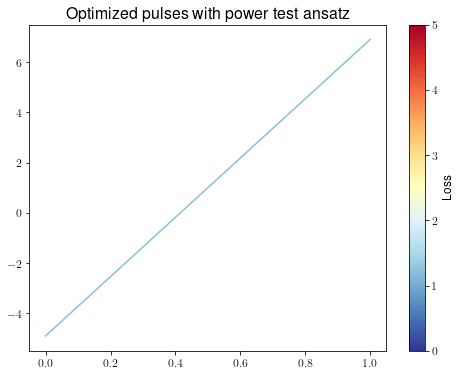

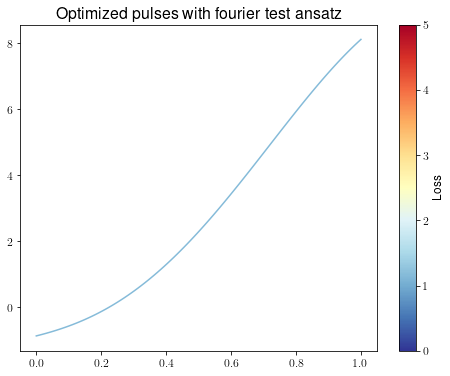

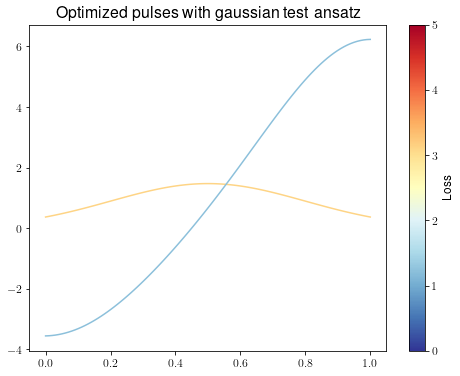

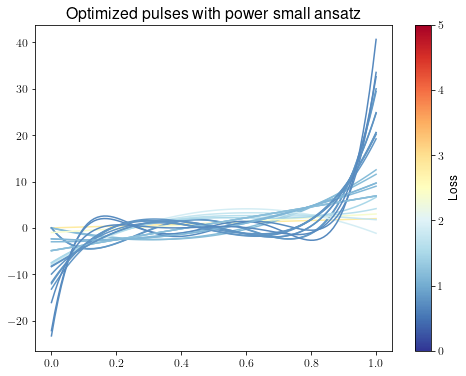

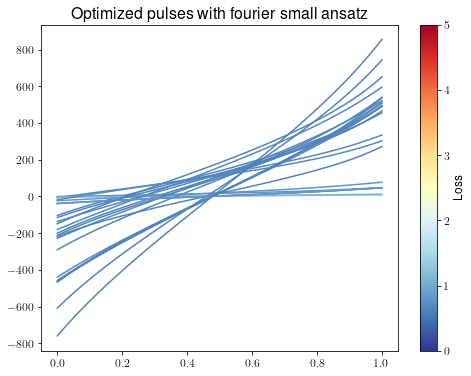

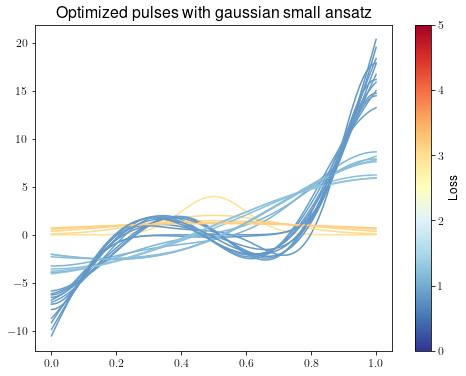

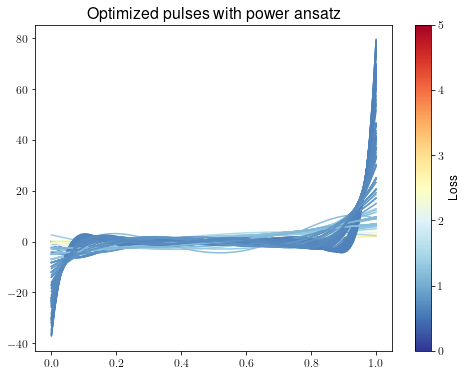

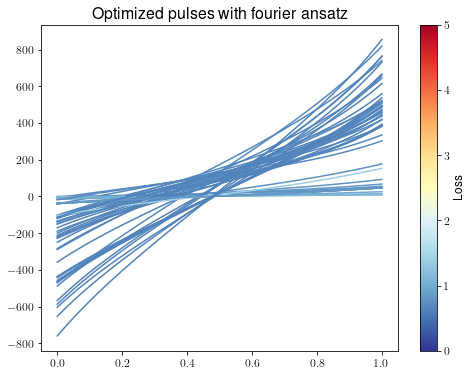

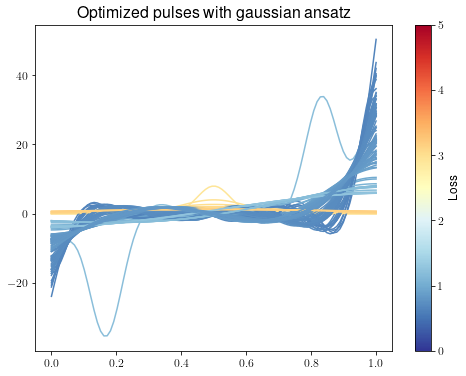

In [117]:
plot_runs(runs, pulse_lookup, fun_lookup, coefficients_lookup, class_args_lookup)

In [118]:
def plot_runs_parametrizations(runs: list, pulse_lookup: dict, fun_lookup: dict, coefficients_lookup: dict, class_args_lookup: dict): 
    for run in runs: 
        pulses = pulse_lookup[run]
        funs = fun_lookup[run]
        coefficients_list = coefficients_lookup[run]
        factoryClass = factory_lookup[run]
        class_arg_list = class_args_lookup[run]
        
        fig, ax = plt.subplots()
        for pulse, fun, coefficients, class_args in zip(pulses, funs, coefficients_list, class_arg_list): 
            x = np.linspace(0.0, 1.0, 100)
            waveform = pulse.get_parametrization()
            y = np.array([waveform(s) for s in x])
            plt.plot(x, y, color=convert_value_to_color(fun), label=str(coefficients))
        plt.title(f"Optimized pulse parametrizations with {run.replace('_', ' ')} ansatz")
        
        cmap = plt.cm.get_cmap('RdYlBu_r')
        norm = plt.Normalize(vmin=0, vmax=5)
        sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax, label='Loss')
        
        plt.show()

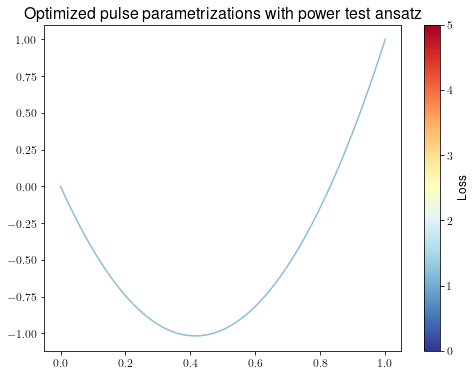

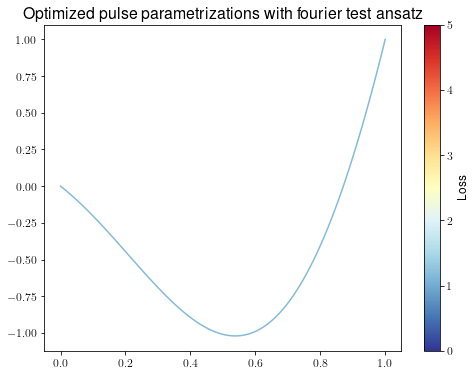

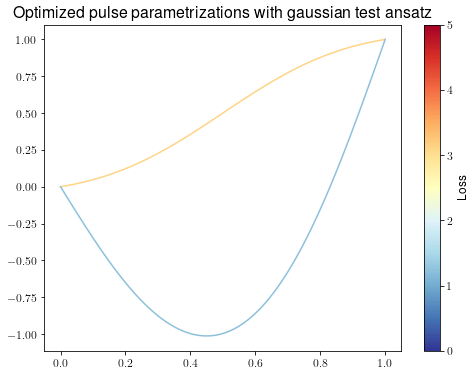

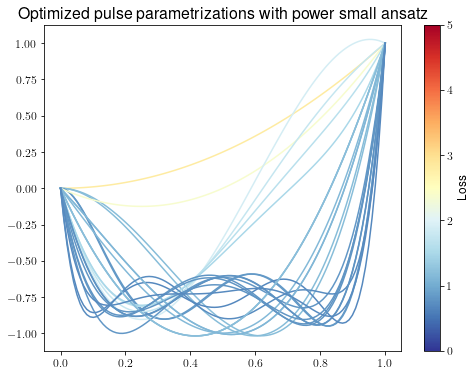

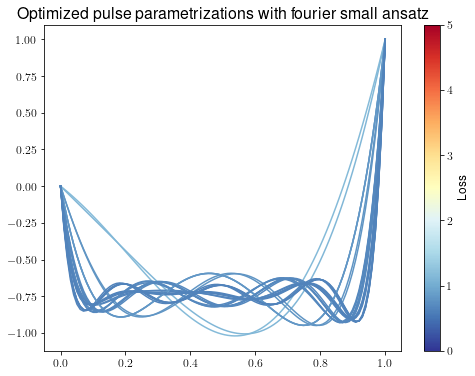

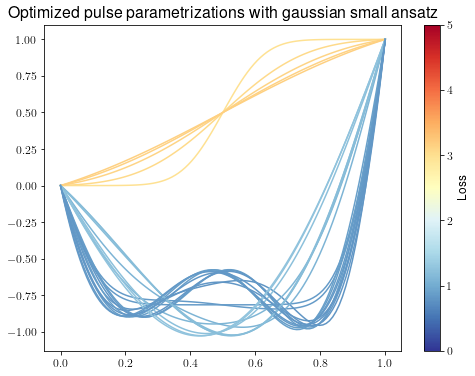

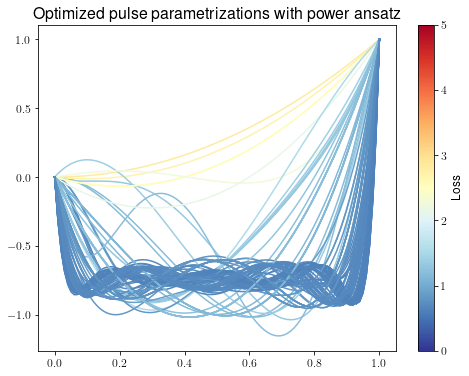

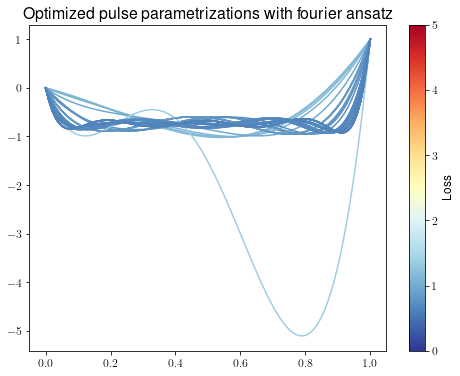

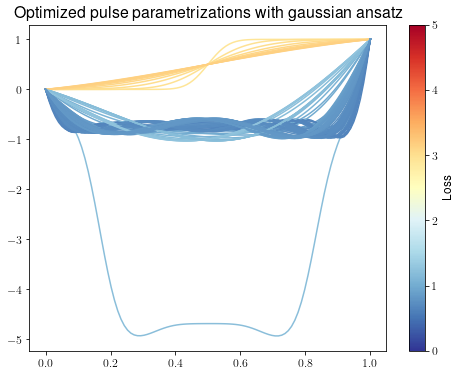

In [115]:
plot_runs_parametrizations(runs, pulse_lookup, fun_lookup, coefficients_lookup, class_args_lookup)

## Loss analysis
To understand the result, we have to better understand the Ito integrals, later referred to as integrands. 

In [63]:
from pulse_opt.integrals.utilities import integrand_lookup

In [66]:
total_integrand = lambda theta: sum((integrand(theta) for integrand in integrand_lookup.values()))

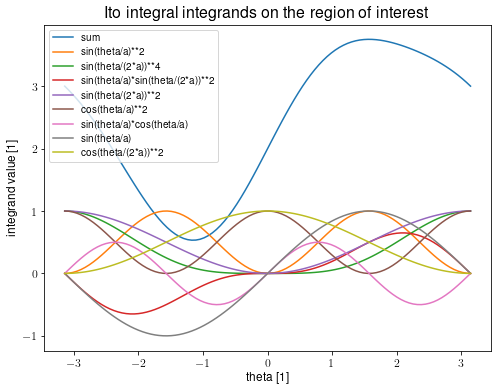

In [74]:
plt.figure()
x = np.linspace(-np.pi, np.pi, 100)
y = np.array([total_integrand(s) for s in x])
plt.plot(x, y, label="sum")
for name, integrand in integrand_lookup.items(): 
    y = np.array([integrand(s) for s in x])
    plt.plot(x, y, label=name)
plt.title("Ito integral integrands on the region of interest")
plt.xlabel('theta [1]')
plt.ylabel('integrand value [1]')
plt.legend()
plt.show()

We now count how many times each integral comes up in the gates. For the general single qubit gate: 

"sin(theta/(2*a))**4": 1x

"sin(theta/a)*sin(theta/(2*a))**2": 1x

"sin(theta/a)": 2x

"sin(theta/(2*a))**2": 2x

"sin(theta/a)**2": 2x

"sin(theta/a)*cos(theta/a)": 1x

"cos(theta/a)**2": 1x

"cos(theta/(2*a))**2: 1x
        
We see that not all integrals have the same weight. In the decomposition of the Noisy gate they also appear in different parts. 

In [107]:
single_qubit_loss_weights = {
    "sin(theta/(2*a))**4": 1.0,
    "sin(theta/a)*sin(theta/(2*a))**2": 1.0,
    "sin(theta/a)": 2.0,
    "sin(theta/(2*a))**2": 2.0,
    "sin(theta/a)**2": 2.0,
    "sin(theta/a)*cos(theta/a)": 1.0,
    "cos(theta/a)**2": 1.0,
    "cos(theta/(2*a))**2": 1.0,
}

In [108]:
single_qubit_loss = lambda theta: sum((integrand_lookup[integrand](theta) * weight) for integrand, weight in single_qubit_loss_weights.items())

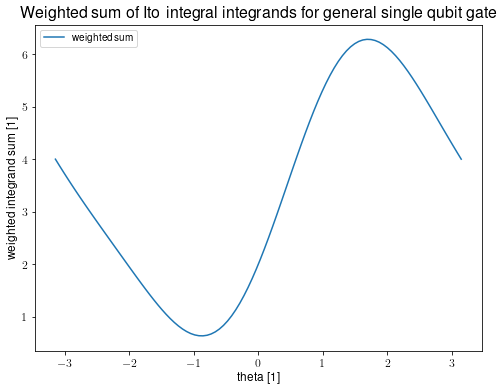

In [112]:
plt.figure()
x = np.linspace(-np.pi, np.pi, 100)
y = np.array([single_qubit_loss(s) for s in x])
plt.plot(x, y, label="weighted sum")
plt.title("Weighted sum of Ito integral integrands for general single qubit gate")
plt.xlabel('theta [1]')
plt.ylabel('weighted integrand sum [1]')
plt.legend()
plt.show()